# Banglore  house price prediction

## In this project first we will clean the data then will be doing some predictions.

### This datset is about banglore houses details. it contains following columns:
area_type

availability

location

size

society

total_sqft

bath

balcony

prize

In [10]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# loading data

df= pd.read_csv('d:/bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Cleaning the data

In [12]:
df.shape

(13320, 9)

In [13]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [14]:
# dropping the unnecessary columns

df2=df.drop(['area_type','availability','society'],axis='columns')
df2.head()


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


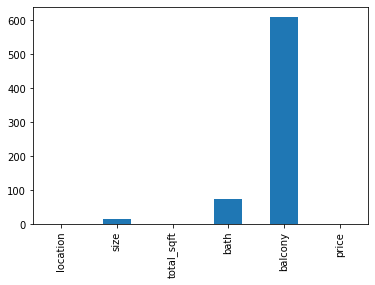

In [15]:
# checking null values

df2.isnull().sum().plot.bar()
plt.show()

In [16]:
# dropping the null values

df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [17]:
df3.shape

(12710, 6)

In [18]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [19]:
# getting the values of bedrooms from size column into new column named bhk

df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\HP\AppData\Local\Temp\ipykernel_11268\4050483458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [20]:
# dropping the size column

df3=df3.drop(['size'],axis='columns')
df3.shape

(12710, 6)

In [15]:
df3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [21]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
# checking the values of total_sqft column

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [23]:
print(df3[~df3['total_sqft'].apply(is_float)])

                 location   total_sqft  bath  balcony    price  bhk
30              Yelahanka  2100 - 2850   4.0      0.0  186.000    4
122                Hebbal  3067 - 8156   4.0      0.0  477.000    4
137    8th Phase JP Nagar  1042 - 1105   2.0      0.0   54.005    2
165              Sarjapur  1145 - 1340   2.0      0.0   43.490    2
188              KR Puram  1015 - 1540   2.0      0.0   56.800    2
...                   ...          ...   ...      ...      ...  ...
12975          Whitefield   850 - 1060   2.0      0.0   38.190    2
12990      Talaghattapura  1804 - 2273   3.0      0.0  122.000    3
13059              Harlur  1200 - 1470   2.0      0.0   72.760    2
13265               Hoodi  1133 - 1384   2.0      0.0   59.135    2
13299          Whitefield  2830 - 2882   5.0      0.0  154.500    4

[186 rows x 6 columns]


here we can see this column contains some range values also

In [24]:
# now converting the range values into single average value

def convert(x):
    l=x.split('-')
    # print("len is ",len(l))
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2
    else:
        try:
            return float(x)
        except:
            return None


In [25]:
print(convert('1804 - 2273'))

2038.5


In [26]:
df4=df3.copy()

In [27]:
df4['total_sqft']=df['total_sqft'].apply(convert)

In [38]:
df4.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [28]:
# price/sqft into new column named price_pr_sqft

df5=df4.copy()
df5['price_pr_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()


,location,total_sqft,bath,balcony,price,bhk,price_pr_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [29]:
# checking the location column

location_counts=df5.groupby('location')['location'].agg('count').sort_values()
location_counts

location
 Anekal                                 1
Kathriguppe IV Phase                    1
Keerthi Layout                          1
Kenchanehalli R R Nagar                 1
Kengeri Satellite Town ( BDA SITE)      1
                                     ... 
Thanisandra                           231
Kanakpura Road                        261
Electronic City                       300
Sarjapur  Road                        372
Whitefield                            514
Name: location, Length: 1265, dtype: int64

In [31]:
# here we don't want the location counts between 1 to 10

location_under_10=location_counts[location_counts<=10]
len(location_under_10)

1028


In [32]:
df5['location']=df5['location'].apply(lambda x:None if x in location_under_10 else x)
df5.shape

(12710, 7)

In [34]:
df5=df5.dropna()
df5.shape

(9932, 7)

# Removing the Outliers

In [36]:
df5['sqft/bhk']=df5['total_sqft']/df5['bhk']
df5['sqft/bhk']

0         528.000000
1         650.000000
2         480.000000
3         507.000000
4         600.000000
            ...     
13314     571.666667
13315     690.600000
13317     570.500000
13318    1172.250000
13319     550.000000
Name: sqft/bhk, Length: 9932, dtype: float64

In [37]:
sqft_bhk_mean=df5['sqft/bhk'].mean()
sqft_bhk_mean

570.9869882527693

In [38]:
sqft_bhk_mean_add25=sqft_bhk_mean*1.25

sqft_bhk_mean_sub25=sqft_bhk_mean*.75

In [40]:
df6=df5[(df5['total_sqft']/df5['bhk']>sqft_bhk_mean_sub25) & (df5['total_sqft']/df5['bhk']<sqft_bhk_mean_add25)]
df6.shape

(7505, 8)

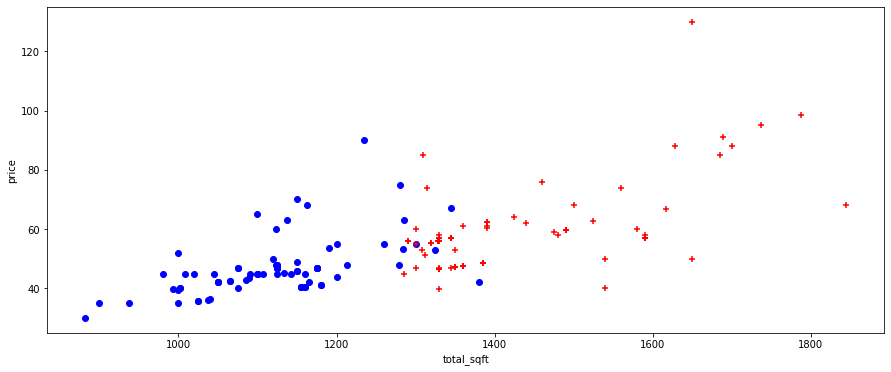

In [83]:
def show_location(dff,x):
    df_bhk2=dff[(dff.location==x) & (dff.bhk==2)]
    
    df_bhk3=dff[(dff.location==x) & (dff.bhk==3)]
    
    plt.figure(figsize=(15,6))
    
    plt.scatter(df_bhk2.total_sqft,df_bhk2.price,color='blue')
    
    plt.scatter(df_bhk3.total_sqft,df_bhk3.price,color='red',marker='+')
    
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.show()
    
show_location(df6,'Uttarahalli')    
    



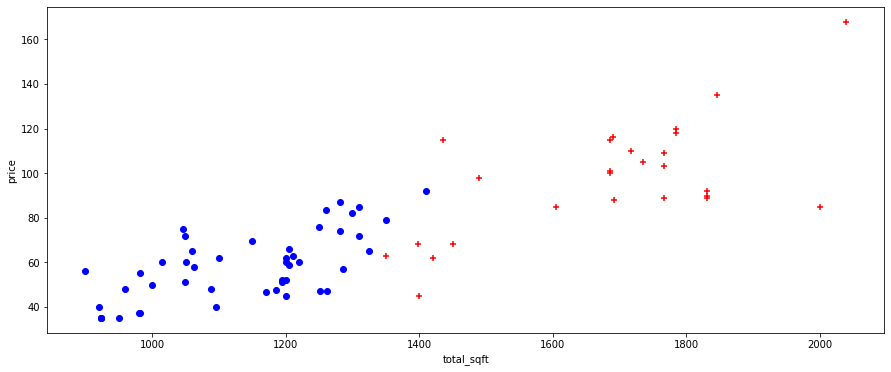

In [90]:
show_location(df6,'Bellandur')

In [74]:
location_count=df6.groupby('location')
list_df=[]
for locate,dfloc in location_count:
#     print('locate',locate)
#     print('dfloc',dfloc)
    dfloc['price_sft']=dfloc['total_sqft']/dfloc['bhk']
# dfloc.head()
    price_sqft_mean=dfloc['price_sft'].mean()
    price_sqft_mean_add25=price_sqft_mean*1.25
    price_sqft_mean_sub25=price_sqft_mean*.75

#     print("before",dfloc.shape)

    df7=dfloc[(dfloc['price_sft']>price_sqft_mean_sub25) & (dfloc['price_sft']<price_sqft_mean_add25)]
    
    list_df.append(df7)
    
    

In [75]:
df8=pd.concat(list_df,ignore_index=True,sort=False)

In [76]:
df8

,location,total_sqft,bath,balcony,price,bhk,price_pr_sqft,sqft/bhk,price_sft
0,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,3200.000000,625.000000,625.000000
1,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,6916.666667,600.000000,600.000000
2,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419,585.000000,585.000000
3,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509,475.000000,475.000000
4,Devarachikkanahalli,947.0,2.0,2.0,43.00,2,4540.654699,473.500000,473.500000
...,...,...,...,...,...,...,...,...,...
7395,Yeshwanthpur,1692.0,3.0,3.0,108.00,3,6382.978723,564.000000,564.000000
7396,Yeshwanthpur,1169.0,2.0,2.0,64.08,2,5481.608212,584.500000,584.500000
7397,Yeshwanthpur,1160.0,2.0,2.0,64.08,2,5524.137931,580.000000,580.000000
7398,Yeshwanthpur,1855.0,3.0,3.0,135.00,3,7277.628032,618.333333,618.333333


Text(0, 0.5, 'Count')

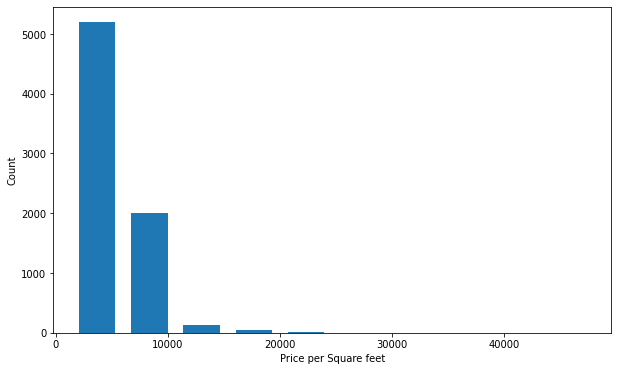

In [81]:
plt.figure(figsize=(10,6))
plt.hist(df8.price_pr_sqft, rwidth = 0.7)
plt.xlabel("Price per Square feet")
plt.ylabel("Count")

In [91]:
# now lets filter out with the bath and balcony

df9=df8[(df8['bath']<df8['bhk']+2)&(df8['balcony']<df8['bhk']+1)]
df9.shape

(7154, 9)

In [92]:
df9.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'bhk',
       'price_pr_sqft', 'sqft/bhk', 'price_sft'],
      dtype='object')

In [93]:
# now removing the unnecessary columns

dfmain=df9.drop(['price_pr_sqft','sqft/bhk','price_sft'],axis='columns')
dfmain

,location,total_sqft,bath,balcony,price,bhk
0,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2
1,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2
2,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2
3,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3
4,Devarachikkanahalli,947.0,2.0,2.0,43.00,2
...,...,...,...,...,...,...
7395,Yeshwanthpur,1692.0,3.0,3.0,108.00,3
7396,Yeshwanthpur,1169.0,2.0,2.0,64.08,2
7397,Yeshwanthpur,1160.0,2.0,2.0,64.08,2
7398,Yeshwanthpur,1855.0,3.0,3.0,135.00,3


# Model Building

In [94]:
dummies=pd.get_dummies(dfmain.location,drop_first=True)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
dffinal=pd.concat([dfmain,dummies],axis='columns')
dffinal.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# splitting the data into train and test

x=dffinal.drop(['price','location'],axis='columns')
x.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1170.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1425.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,947.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
y=dffinal['price']
y.head()

0    40.0
1    83.0
2    40.0
3    65.0
4    43.0
Name: price, dtype: float64

In [108]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)


In [109]:
m=linear_model.LinearRegression()
m.fit(x_train,y_train)
print(m.score(x_test,y_test))

0.6309158896431349
